In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

from gan.train import train
from gan.artmodels import Discriminator, Generator
from gan.losses import w_gan_disloss, w_gan_genloss


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [3]:
NOISE_DIM = 100
NUM_EPOCHS = 50
learning_rate = 0.001

In [4]:
batch_size = 1

root = './Abstract_gallery'

imsize = 512 if root == './Abstract_gallery' else 4096

art_train = ImageFolder(root=root, transform=transforms.Compose([
  transforms.ToTensor(),
    
  # Example use of RandomCrop:
  transforms.Resize(int(1.15 * imsize)),
  transforms.RandomCrop(imsize),
]))

art_loader_train = DataLoader(art_train, batch_size=batch_size, drop_last=True)

In [5]:
D = Discriminator().to(device)
G = Generator(noise_dim=NOISE_DIM).to(device)

In [6]:
D_optimizer = torch.optim.Adam(D.parameters(), lr=learning_rate, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate, betas = (0.5, 0.999))

EPOCH:  1


c:\Users\88693\anaconda3\envs\jupyter\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Iter: 0, D: 9.178, G:0.5173


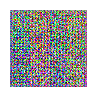


Iter: 250, D: 0.4394, G:6.165


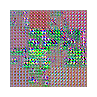


Iter: 500, D: -4.217, G:11.14


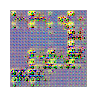

KeyboardInterrupt: 

In [7]:
train(D, G, D_optimizer, G_optimizer, w_gan_disloss, 
          w_gan_genloss, num_epochs=NUM_EPOCHS, show_every=250,
          batch_size=batch_size, train_loader=art_loader_train, device=device, train_every=1, l_gp=10)

In [ ]:
print(8*3*512*512)

6291456
